# Introduction

# Methods

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")
from matplotlib.ticker import AutoMinorLocator

import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_theme(style='white')
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import ensemble
from scipy import stats

#import tensorflow as tf
#from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, LeakyReLU 
#from keras.metrics import AUC
#from keras import backend as K

import shap
from sklearn.inspection import permutation_importance


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import shutup;shutup.please()

C:\Users\esuch\AppData\Local\Temp\ipykernel_17524\2232209617.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [2]:
from matplotlib import style
#print(plt.style.available)
plt.style.use('notebook')

### Loading & Describing Data

In [3]:
df = pd.read_csv('OPDTT.csv')
df.head()

Sample  Fe(II)  Cu(II)  Mn(II)   PQN  1,2-NQ  1,4-NQ      OP
0       1     6.0    0.00    0.00  0.00    0.00     0.0  0.2940
1       2     0.0    0.01    0.00  0.00    0.00     0.0  0.0161
2       3     0.0    0.00    0.01  0.00    0.00     0.0  0.0607
3       4     0.0    0.00    0.00  0.01    0.00     0.0  0.1464
4       5     0.0    0.00    0.00  0.00    0.01     0.0  0.0696

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  100 non-null    int64  
 1   Fe(II)  100 non-null    float64
 2   Cu(II)  100 non-null    float64
 3   Mn(II)  100 non-null    float64
 4   PQN     100 non-null    float64
 5   1,2-NQ  100 non-null    float64
 6   1,4-NQ  100 non-null    float64
 7   OP      100 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 6.4 KB


In [5]:
Summary_table = df.describe()
Summary_table.to_csv('Summary_table.csv')
Summary_table

Sample      Fe(II)     Cu(II)      Mn(II)         PQN     1,2-NQ  \
count  100.000000  100.000000  100.00000  100.000000  100.000000  100.00000   
mean    50.500000    0.285600    0.09350    0.093900    0.079600    0.07790   
std     29.011492    1.082802    0.19575    0.195639    0.178879    0.17166   
min      1.000000    0.000000    0.00000    0.000000    0.000000    0.00000   
25%     25.750000    0.000000    0.00000    0.000000    0.000000    0.00000   
50%     50.500000    0.000000    0.00000    0.000000    0.000000    0.00000   
75%     75.250000    0.080000    0.08000    0.080000    0.080000    0.08000   
max    100.000000    8.000000    1.00000    1.000000    1.000000    1.00000   

           1,4-NQ          OP  
count  100.000000  100.000000  
mean     0.089700    0.566773  
std      0.187592    0.424027  
min      0.000000    0.016100  
25%      0.000000    0.203975  
50%      0.000000    0.450400  
75%      0.080000    0.805850  
max      1.000000    1.547700

### Data Processing for Visualization

#### General Data Visualization/ Trends

### Data Processing & visualization for Machine Learning

In [6]:
ML_data = df.drop(['Sample','OP'], axis=1)
ML_data_2 = df.drop(['Sample'], axis=1)

opdtt = df[["Sample","OP"]]
ML_data.head()

Fe(II)  Cu(II)  Mn(II)   PQN  1,2-NQ  1,4-NQ
0     6.0    0.00    0.00  0.00    0.00     0.0
1     0.0    0.01    0.00  0.00    0.00     0.0
2     0.0    0.00    0.01  0.00    0.00     0.0
3     0.0    0.00    0.00  0.01    0.00     0.0
4     0.0    0.00    0.00  0.00    0.01     0.0

opdtt.head()

In [7]:
x = opdtt["Sample"]
y = opdtt["OP"]

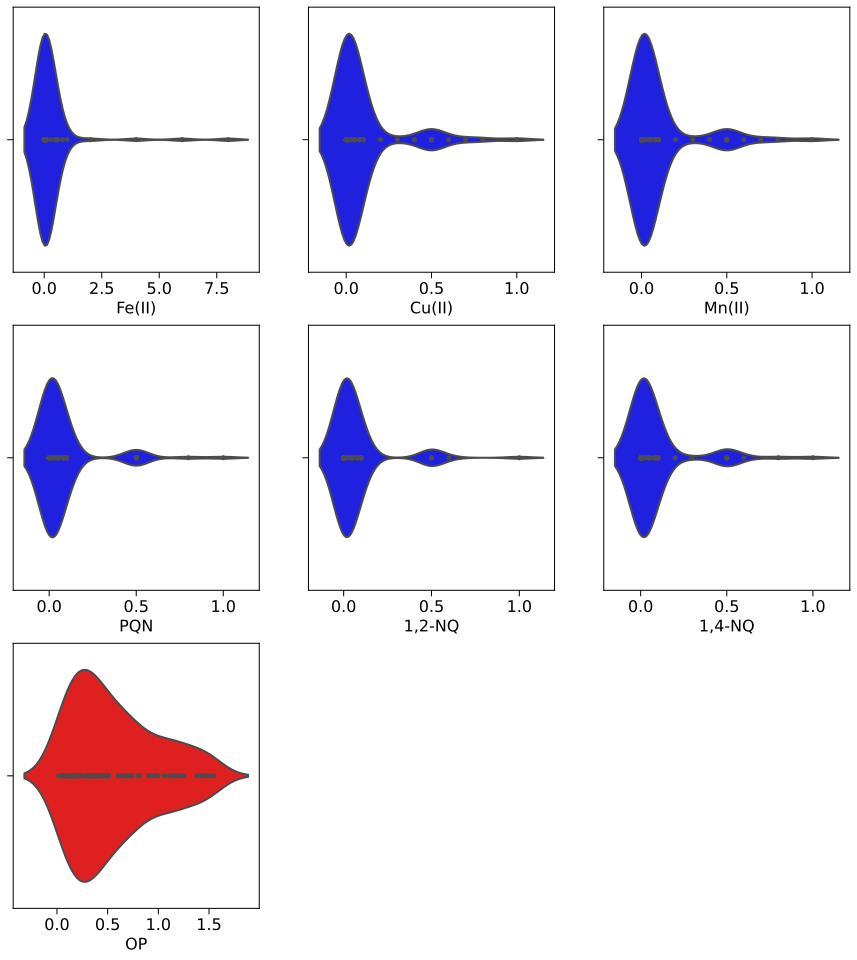

In [8]:
fig = plt.figure(figsize=(15,40))
fig.tight_layout(pad=.5)

ax1 = fig.add_subplot(731)
sns.violinplot(x=ML_data['Fe(II)'],width=.8,inner='point', color='b')
ax2 = fig.add_subplot(732)
sns.violinplot(x=ML_data['Cu(II)'], inner='point',color='b')
ax3 = fig.add_subplot(733)
sns.violinplot(x=ML_data['Mn(II)'], inner='point',color='b')
ax4 = fig.add_subplot(734)
sns.violinplot(x=ML_data['PQN'], width=.6,inner='point', color='b')
ax5 = fig.add_subplot(735)
sns.violinplot(x=ML_data['1,2-NQ'],width=.6,inner='point', color='b')
ax6 = fig.add_subplot(736)
sns.violinplot(x=ML_data['1,4-NQ'], width=.6,inner='point',color='b')
ax7 = fig.add_subplot(737)
sns.violinplot(x=y, inner='point',color='r')
plt.savefig('variables distribution.png', bbox_inches='tight',dpi=1200)

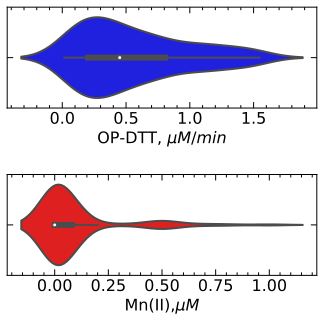

In [9]:
fig = plt.figure(figsize=(5,5))
ax0 = fig.add_subplot(211)
sns.violinplot(x=y, color='b')
ax0.tick_params(axis="x", direction="in", which="both", top=True)
ax0.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.set_xlabel('OP-DTT, $\mu M/min$')

ax1 = fig.add_subplot(212)
sns.violinplot(x=ML_data['Mn(II)'], color='r')
ax1.tick_params(axis="x", direction="in", which="both", top=True)
ax1.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.set_xlabel('Mn(II),$\mu M$')
fig.tight_layout(pad=2.5)
plt.savefig('Species and Measured OP distribution.png', bbox_inches='tight',dpi=1200)

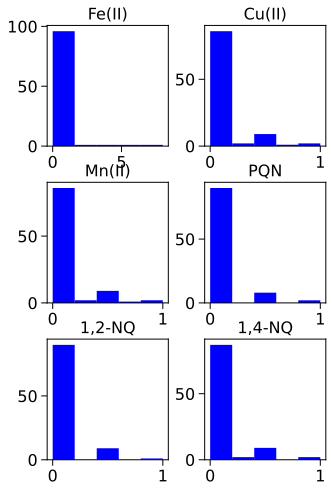

In [10]:
# Viewing the distribution of the features
ML_data.hist(bins=5, figsize=(5,8),grid=False,color="blue");
fig.tight_layout(pad=2.5)
plt.savefig('Histogram of features.png', bbox_inches='tight',dpi=1200)

Fe(II)
Skew : 5.69
Cu(II)
Skew : 2.63
Mn(II)
Skew : 2.62
PQN
Skew : 3.09
1,2-NQ
Skew : 3.06
1,4-NQ
Skew : 2.76


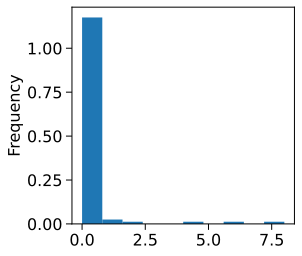

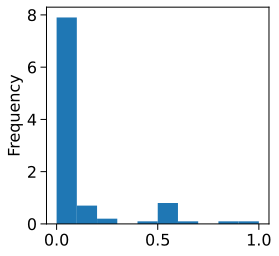

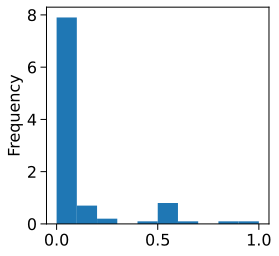

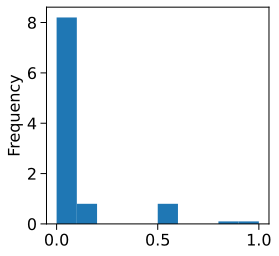

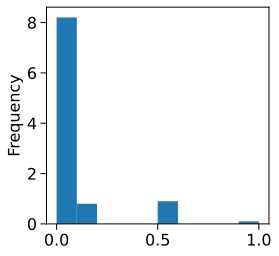

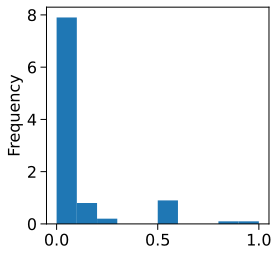

In [11]:
# Skew
num_cols = list(ML_data.columns)

for col in num_cols:
    print(col)
    print('Skew :',round(ML_data[col].skew(),2))
    plt.figure(figsize = (4,4))
    ML_data[col].plot.hist(xlabel = col, density = True)
plt.savefig('Checking skewness of features.png', bbox_inches='tight',dpi=1200)
plt.show()

Fe(II)


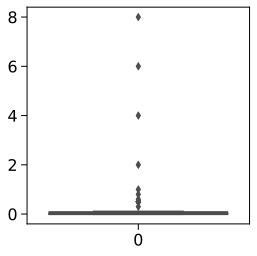

Cu(II)


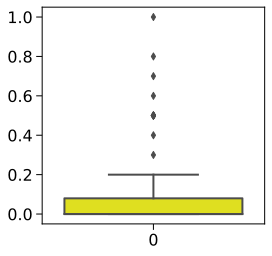

Mn(II)


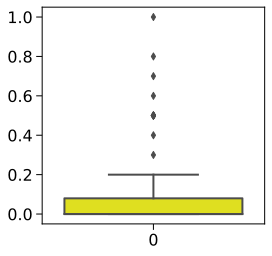

PQN


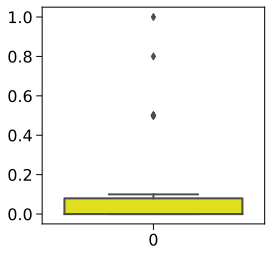

1,2-NQ


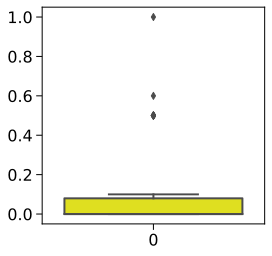

1,4-NQ


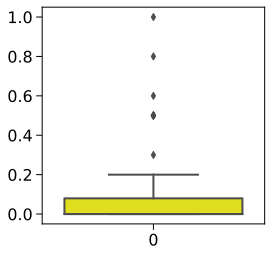

In [12]:
# Box plots
for col in num_cols:
        print(col)
        plt.figure(figsize = (4,4))
        sns.boxplot(data=ML_data[col], color='yellow')
        plt.show()

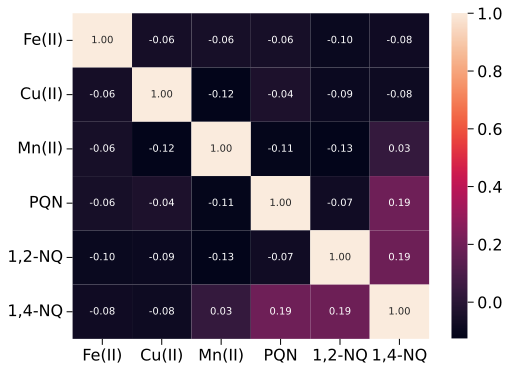

In [13]:
plt.figure()
sns.heatmap(ML_data.corr(), annot=True, fmt='0.2f')
plt.savefig('Pearson correlation between features.png', bbox_inches='tight',dpi=1200)
plt.show()

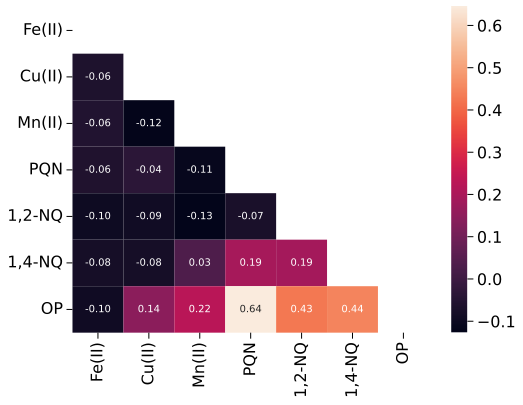

In [14]:
#plt.figure(figsize=(7,5))
corr= ML_data_2.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='0.2f', mask=matrix)
plt.savefig('Pearson correlation between features and OP-DTT.png', bbox_inches='tight',dpi=1200)
plt.show()

In [15]:
from scipy import stats
stats.pearsonr(ML_data_2['1,2-NQ'], ML_data_2['OP'])

(0.42507705626167225, 1.0419038275970946e-05)

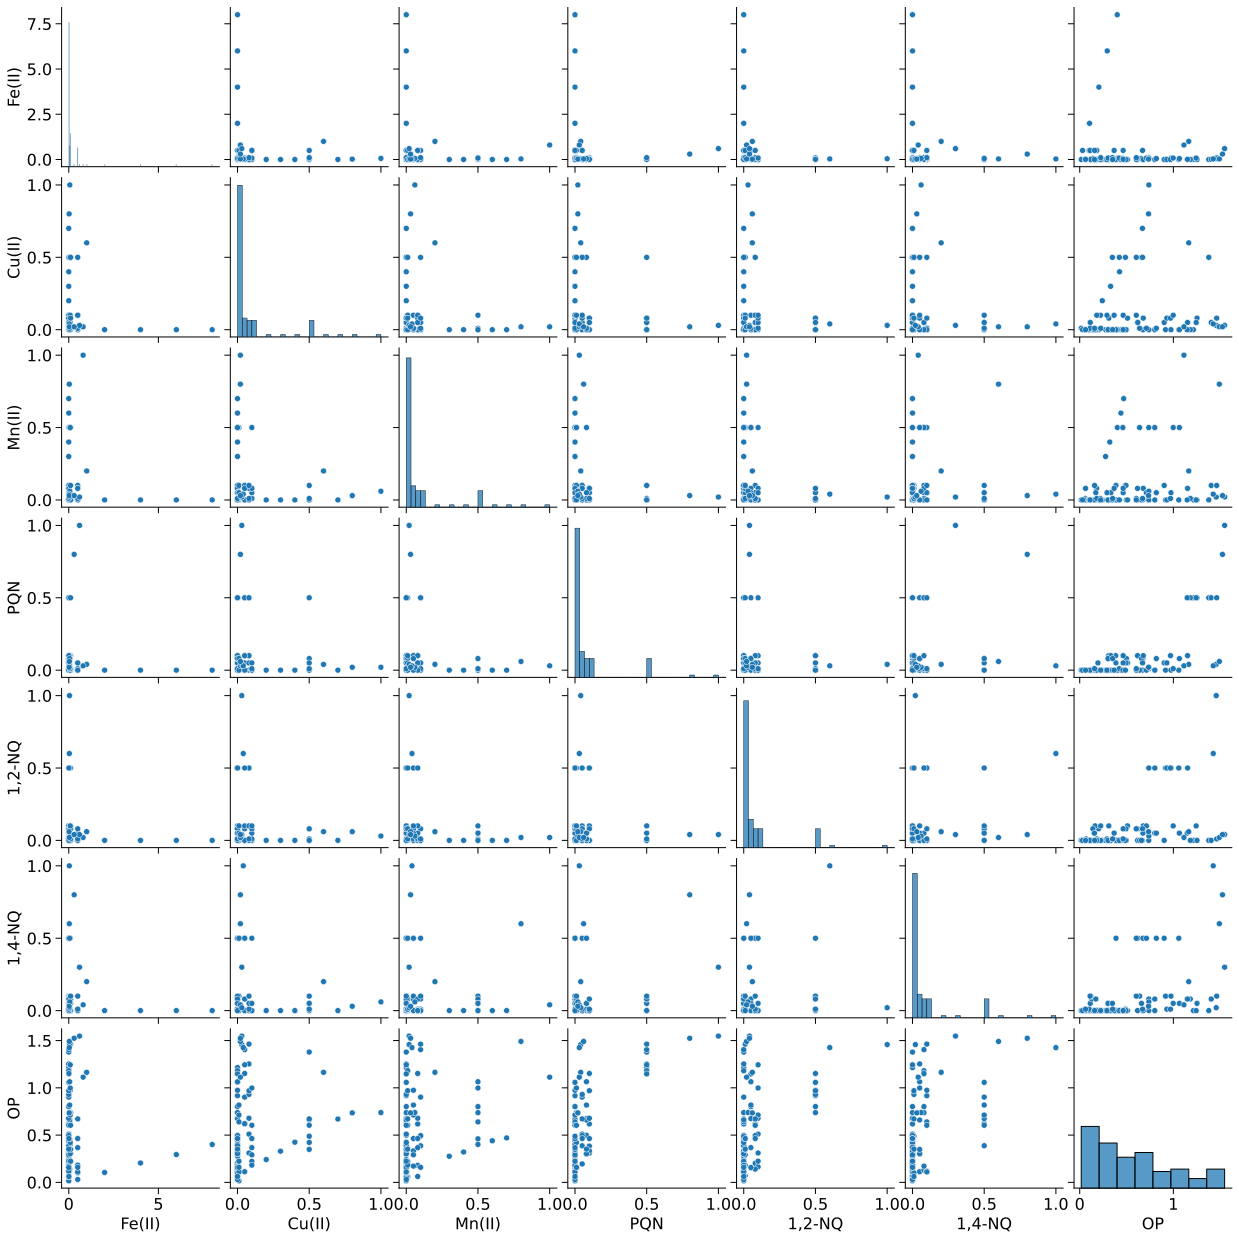

<Figure size 576x432 with 0 Axes>

In [16]:
sns.pairplot(ML_data_2)
plt.show()
plt.savefig('Scatter plot of features.png', bbox_inches='tight',dpi=1200)

### Train-Test split & Scaling

In [17]:
# Making X the matrix for the features
X = ML_data
# and y as the label
y = df[["OP"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.25, 
                                                    random_state=42,
                                                    shuffle= True
                                            )
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
len(X_train), len(X_test)

(75, 25)

scaler = StandardScaler()

X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# transform test data using parameters estimated from training data
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [19]:
X_train_s = X_train
X_test_s = X_test

# Model Training, Prediction & Evaluation

## RandomForest

In [20]:
forest_reg = ensemble.RandomForestRegressor(max_depth=6)
forest_reg.fit(X_train_s, y_train)

RandomForestRegressor(max_depth=6)

In [21]:
forest_reg.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
forest_ytrain_p = forest_reg.predict(X_train_s)
# test set
forest_ytest_p = forest_reg.predict(X_test_s)

rfmae_train = (np.mean(abs(forest_ytrain_p - y_train)))
rfmae_test = (np.mean(abs(forest_ytest_p - y_test)))
rfmse_train = mean_squared_error(y_train, forest_ytrain_p)
rfrmse_train = np.sqrt(rfmse_train)
rfmse_test = mean_squared_error(y_test, forest_ytest_p)
rfrmse_test = np.sqrt(rfmse_test)

rfR2_train = forest_reg.score(X_train_s, y_train)
rfR2_test = forest_reg.score(X_test_s, y_test)

print("Train set: MAE= {:.3f}".format(rfmae_train))
print("Test set: MAE= {:.3f}".format(rfmae_test))

print ('='*50)

print("Train set: RMSE= {:.3f}".format(rfrmse_train))
print("Test set: RMSE= {:.3f}".format(rfrmse_test))

print ('='*50)

print("Train set: R2= {:.2f}".format(rfR2_train))
print("Test set: R2= {:.2f}".format(rfR2_test))

Train set: MAE= 0.054
Test set: MAE= 0.083
Train set: RMSE= 0.068
Test set: RMSE= 0.101
Train set: R2= 0.98
Test set: R2= 0.91


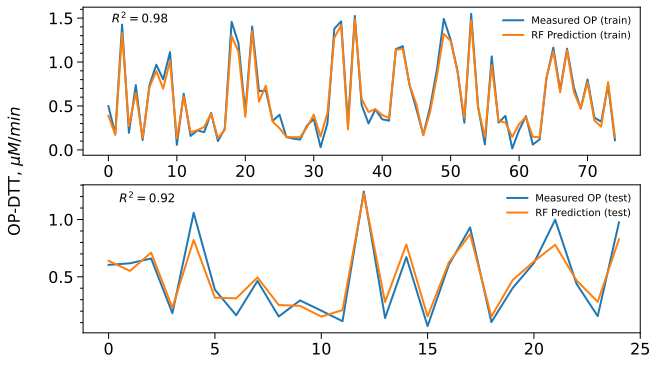

In [23]:
# compare model prediction on test data with y_test
#plt.figure(figsize=(5,5))


fig, ax = plt.subplots(2,1, figsize=(10, 6))

fig.supylabel('OP-DTT, $\mu M/min$', fontsize=16)

ax[0].plot(y_train,label="Measured OP (train)")
ax[0].plot(forest_ytrain_p, label="RF Prediction (train)")
ax[0].legend(loc="upper right", frameon=False, prop={'size':10})

ax[1].plot(y_test,label="Measured OP (test)")
ax[1].plot(forest_ytest_p, label="RF Prediction (test)")
ax[1].legend(loc="upper right", frameon=False, prop={'size':10})
plt.xlim(-1.2,25)

ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())

ax[1].text(.5, 1.15, r'$R^2 = 0.92$', fontsize=12)
ax[0].text(.5, 1.45, r'$R^2 = 0.98$', fontsize=12)

plt.show()
fig.savefig('RF_prediction accuracy.png', bbox_inches='tight', dpi=1200)

In [24]:
# let use stats from scipy library
from scipy import stats
# and look confidence of .95, or the area that a value will be inside the range with 95 chances of 100
confidence = 0.95
squared_errors = (forest_ytest_p - y_test)**2

st = np.sqrt(stats.t.interval(
    confidence, 
    len(squared_errors)-1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

Standard deviation from gridsearch is between 7 and 10 at 95% confidence interval

In [25]:
stats.ttest_ind(forest_ytest_p, y_test, permutations=10,
                random_state=42)

Ttest_indResult(statistic=0.1060378407918008, pvalue=0.9)

# XG Boost

In [26]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error


params = {
    "n_estimators": 400,
    "max_depth": 4,
    "min_samples_split": 2,
    "learning_rate": 0.02,
    "loss": "squared_error",
}


xgb = ensemble.GradientBoostingRegressor(**params)
xgb.fit(X_train_s, y_train)

xgb_ytrain_p = xgb.predict(X_train_s)
# test set
xgb_ytest_p = xgb.predict(X_test_s)

xgbmae_train = (np.mean(abs(xgb_ytrain_p - y_train)))
xgbmae_test = (np.mean(abs(xgb_ytest_p - y_test)))
xgbmse_train = mean_squared_error(y_train, xgb_ytrain_p)
xgbrmse_train = np.sqrt(xgbmse_train)
xgbmse_test = mean_squared_error(y_test, xgb_ytest_p)
xgbrmse_test = np.sqrt(xgbmse_test)

xgbR2_train = xgb.score(X_train_s, y_train)
xgbR2_test = xgb.score(X_test_s, y_test)

In [27]:
# Set global font size
plt.rcParams.update({'font.size': 20})

# Set global spines linewidth
plt.rcParams['axes.linewidth'] = 2

# Set global tick length and width
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

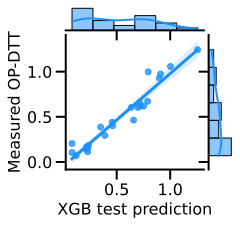

In [28]:
#sns.despine(top=True, right=True, left=False, bottom=False)
ax0 = fig.add_subplot(121)
a = sns.jointplot(
    x=xgb_ytest_p,
    y=y_test, color='dodgerblue',
    kind='reg', height=3) # or 'kde' or 'hex')
a.set_axis_labels('XGB test prediction', 'Measured OP-DTT')
plt.tight_layout()
plt.savefig('Measured vs Predicted OP for test set.png', bbox_inches='tight', dpi=1200)
plt.show()

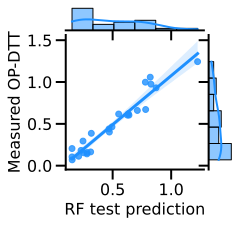

In [29]:
#sns.despine(top=True, right=True, left=False, bottom=False)
ax0 = fig.add_subplot(121)
a = sns.jointplot(
    x=forest_ytest_p,
    y=y_test, color='dodgerblue',
    kind='reg', height=3) # or 'kde' or 'hex')
a.set_axis_labels('RF test prediction', 'Measured OP-DTT')
plt.tight_layout()
plt.savefig('Measured vs Predicted OP for RF.png', bbox_inches='tight', dpi=1200)
plt.show()

In [30]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

r2(xgb_ytrain_p, y_train)

0.9982445941634204

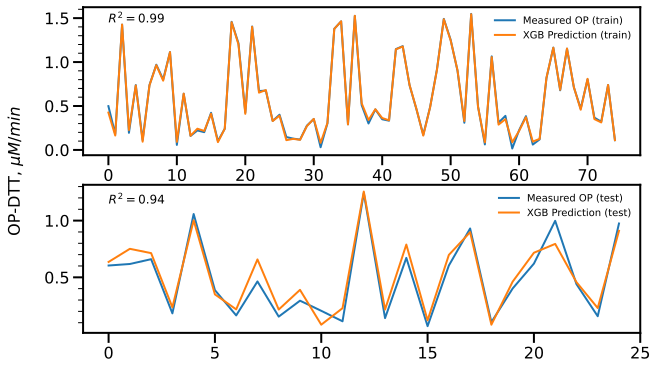

In [31]:
# compare model prediction on test data with y_test
#plt.figure(figsize=(5,5))


fig, ax = plt.subplots(2,1, figsize=(10, 6))

fig.supylabel('OP-DTT, $\mu M/min$', fontsize=16)

ax[0].plot(y_train,label="Measured OP (train)")
ax[0].plot(xgb_ytrain_p, label="XGB Prediction (train)")
ax[0].legend(loc="upper right", frameon=False, fontsize=15, prop={'size':10})

ax[1].plot(y_test,label="Measured OP (test)")
ax[1].plot(xgb_ytest_p, label="XGB Prediction (test)")
plt.legend(loc="upper right", frameon=False, prop={'size':10})
plt.xlim(-1.2,25)

ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())

ax[1].text(0, 1.15, r'$R^2 = 0.94$', fontsize=12)
ax[0].text(0, 1.45, r'$R^2 = 0.99$', fontsize=12)

plt.show()
fig.savefig('XGB_prediction accuracy.png', bbox_inches='tight', dpi=1200)

## Training and test performance summary

In [32]:
data = [[rfR2_test, rfmae_test, rfrmse_test],
[xgbR2_test, xgbmae_test, xgbrmse_test]]
headers=["$R^2$", "MAE", "RMSE"]
rowheaders =["RF_test", "XGB_test"]

perf = pd.DataFrame(data, rowheaders, headers)
perf

$R^2$       MAE      RMSE
RF_test   0.910640  0.082660  0.101020
XGB_test  0.927397  0.077026  0.091057

In [33]:
data2 = [[rfR2_train, rfmae_train, rfrmse_train],
[xgbR2_train, xgbmae_train, xgbrmse_train]]
headers=["R2", "MAE", "RMSE"]
rowheaders =["RF_train", "XGB_train"]

perf2 = pd.DataFrame(data2, rowheaders, headers)
perf2

R2       MAE      RMSE
RF_train   0.976247  0.053953  0.068348
XGB_train  0.998203  0.011726  0.018801

In [34]:
# Set global font size
plt.rcParams.update({'font.size': 20})

# Set global spines linewidth
plt.rcParams['axes.linewidth'] = 2

# Set global tick length and width
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

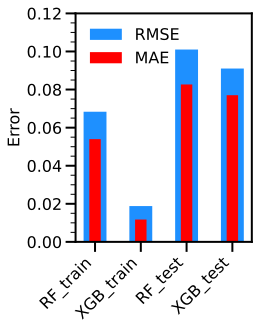

In [35]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(111)
a = perf.index
b = perf2.index

ind = np.arange(len(a))
ax.bar(x=b, height=perf2['RMSE'], width=0.5,align='center', color='dodgerblue', label='RMSE')
ax.bar(x=a, height=perf['RMSE'], width=0.5,align='center', color='dodgerblue')

ax.bar(x=b, height=perf2['MAE'], width=0.5/2,align='center', color='red')
ax.bar(x=a, height=perf['MAE'], width=0.5/2,align='center', color='red',label='MAE')


ax.spines[['right', 'top', 'left']].set_visible(True)
#ax.tick_params(axis="x", direction="in", which="both", top=True)
ax.tick_params(axis="y", direction="out", which="both", right=False, left=True)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.ylim(0,0.12)
plt.ylabel('Error')#, $\mu M/min$')
plt.legend(loc=2, frameon=False)
plt.tight_layout()
plt.savefig('Model Performance.png', bbox_inches='tight', dpi=1200)
plt.show()

array([0.32545864, 0.41930945, 0.17779095, 0.17175019, 0.11607541,
       0.04481173, 0.10004615])

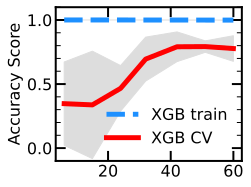

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb, X_train_s, y_train,  train_sizes=np.linspace(0.1, 1.0, 7))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot
fig, ax = plt.subplots(figsize=(4,3))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis="y", direction="in", which="both", right=True)
ax.tick_params(axis="x", direction="in", which="both", top=True)
ax.set_ylim([-0.1, 1.1])

plt.plot(train_sizes, train_mean, '--',  label="XGB train", color='dodgerblue', linewidth=5)
plt.plot(train_sizes, test_mean, label="XGB CV", color='r', linewidth=5)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

#plt.xlabel("Training Set Size");
plt.ylabel("Accuracy Score"); plt.legend(loc="lower right", frameon =False)
plt.tight_layout()
plt.savefig('Learning curve of XGB.png', bbox_inches='tight', dpi=1200)
#list(map('{:.2f}'.format,train_std))
test_std

array([0.15693006, 0.19034652, 0.0966715 , 0.19881377, 0.0689135 ,
       0.04068174, 0.07165803])

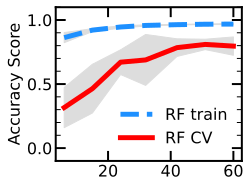

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest_reg, X_train_s, y_train,  train_sizes=np.linspace(0.1, 1.0, 7))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot
fig, ax = plt.subplots(figsize=(4,3))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis="y", direction="in", which="both", right=True)
ax.tick_params(axis="x", direction="in", which="both", top=True)
ax.set_ylim([-0.1, 1.1])

plt.plot(train_sizes, train_mean, '--',  label="RF train", color='dodgerblue', linewidth=5)
plt.plot(train_sizes, test_mean, label="RF CV", color='r', linewidth=5)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

#plt.xlabel("Training Set Size"),
plt.ylabel("Accuracy Score"), plt.legend(loc="lower right", frameon =False)
plt.tight_layout()
plt.savefig('Learning curve of RF.png', bbox_inches='tight', dpi=1200)
test_std

## Recombining train and test data for SHAP analysis

In [38]:
X_ = X
y_ = y

In [39]:
y_.to_csv('y_.csv')

In [40]:
X_.to_csv('X_.csv')

In [41]:
xgb=xgb.fit(X_, y_)

# Species Importance to OP-DTT

### RandomForest & XG Boost Feature Importance (GINI Importance)

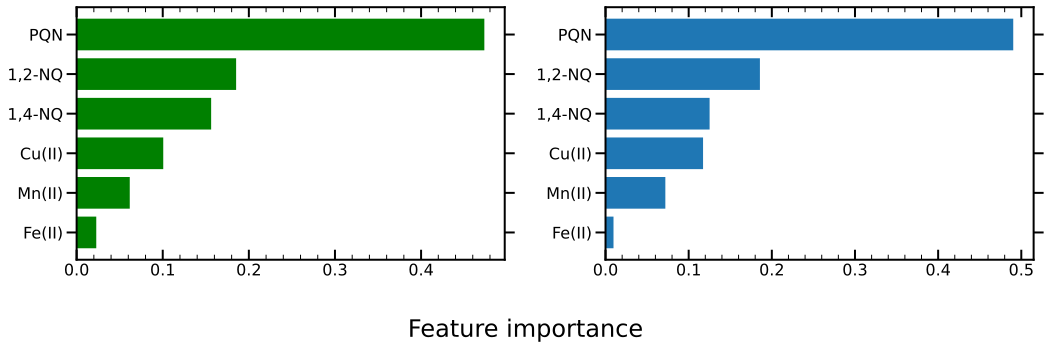

In [42]:
#Random forest feature importances

rf_importances = forest_reg.feature_importances_
columns = X_.columns

rf_importances = pd.DataFrame(rf_importances, index=columns,columns=['Importance']).sort_values(by='Importance',ascending=True)

fig = plt.figure(figsize=(15,5)); 
fig.supxlabel('Feature importance')
ax0 = fig.add_subplot(121)
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.tick_params(axis="y", direction="out", which="both", right=True)
ax0.tick_params(axis="x", direction="in", which="both", top=True)

plt.barh(rf_importances.index, rf_importances.Importance, color = 'green')

ax1 = fig.add_subplot(122)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis="y", direction="out", which="both", right=True)
ax1.tick_params(axis="x", direction="in", which="both", top=True)

sorted_idx = xgb.feature_importances_.argsort()
columns = X_.columns
plt.barh(columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.tight_layout()
fig.savefig('RF & XGB gini importance.png', bbox_inches='tight', dpi=1200)
plt.show()

## Permutation Importance

### RandomForest & XG Boost Permutation Importance

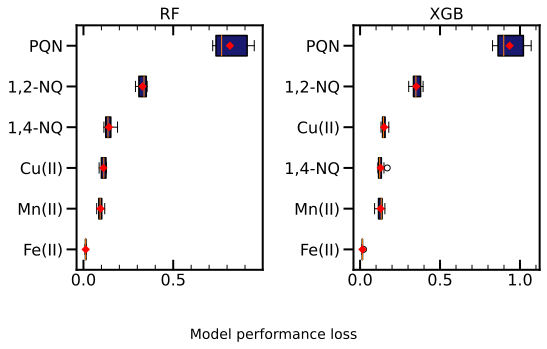

In [43]:
# RANDOM FOREST
rf_result = permutation_importance(
    forest_reg, X_, y_, n_repeats=10, random_state=42, n_jobs=2
)
rf_sorted_idx = rf_result.importances_mean.argsort()
columns = X_.columns

# XGB
xgb_result = permutation_importance(
    xgb, X_, y_, n_repeats=10, random_state=42, n_jobs=2
)
xgb_sorted_idx = xgb_result.importances_mean.argsort()
columns = X_.columns


#PLOTS
fig, ax = plt.subplots(1, 2, figsize=(8, 5), sharey=False) #sharex=True,, )
fig.tight_layout(pad=2.5)
boxprops = dict(linestyle='-', linewidth=1.5, facecolor='midnightblue')
meanpointprops = dict(marker='D', markeredgecolor='None',
                      markerfacecolor='r')
fig.supxlabel('Model performance loss', fontsize=14)
# notched plot
bplot1 = ax[1].boxplot(
    xgb_result.importances[xgb_sorted_idx].T,
    vert=False,
    labels=columns[xgb_sorted_idx], boxprops=boxprops,meanprops=meanpointprops,
                         patch_artist=True, showmeans = True  # fill with color
)
ax[1].set_title('XGB')

# change outlier point symbols
bplot2 = ax[0].boxplot(
    rf_result.importances[rf_sorted_idx].T,
    vert=False,
    labels=columns[rf_sorted_idx], boxprops=boxprops,meanprops=meanpointprops,
                         patch_artist=True, showmeans = True # fill with color
)
ax[0].set_title('RF')


plt.rcParams['axes.linewidth'] = 1.7
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].xaxis.set_minor_locator(AutoMinorLocator())

ax[1].tick_params(axis="x", direction="in", which="both", right=False, top=True)
ax[0].tick_params(axis="x", direction="in", which="both", right=False, top=True)
plt.tight_layout()       
fig.savefig('RFandXGB_permutation importance_boxPloty.png', bbox_inches='tight',dpi=1200)

# XGB-SHAP Analysis

In [44]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_)
shap_interaction = explainer.shap_interaction_values(X_)
shap_df = pd.DataFrame(shap_values); shap_df.columns = X_.columns

In [45]:
print(type(xgb))

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [46]:
shap_df

Fe(II)    Cu(II)    Mn(II)       PQN    1,2-NQ    1,4-NQ
0   0.120785 -0.070253 -0.049818 -0.157018 -0.073113 -0.049981
1  -0.005080 -0.069107 -0.064243 -0.192138 -0.088468 -0.055052
2  -0.005167 -0.082875 -0.062081 -0.177231 -0.086555 -0.058324
3  -0.004205 -0.081607 -0.065449 -0.163861 -0.086974 -0.061757
4  -0.006024 -0.081259 -0.066053 -0.175560 -0.079263 -0.056016
..       ...       ...       ...       ...       ...       ...
95  0.007208  0.252156  0.012827  0.183868  0.410933  0.018797
96 -0.001366  0.227166  0.005577  0.142894  0.305633  0.180509
97 -0.008335  0.139424 -0.018922  0.042813  0.010763  0.001453
98  0.012721  0.188951  0.169385  0.233698  0.064982  0.251149
99 -0.011410  0.123213  0.032700  0.645396  0.032847  0.130921

[100 rows x 6 columns]

In [47]:
shap_df.to_csv('SHAP values.csv')

## SHAP values correlation and grouping

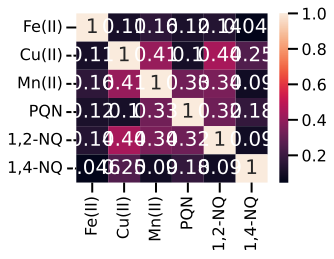

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(shap_df.corr(method='spearman').abs(),annot=True)
plt.tight_layout()
plt.savefig('correlation of SHAP values.png', bbox_inches='tight', dpi=1200)
plt.show()

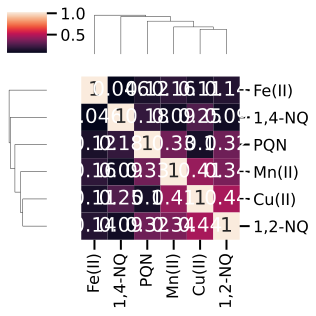

In [49]:
hm= shap_df.corr(method='spearman').abs()
sns.clustermap(hm, figsize=(5,5),annot=True)
plt.tight_layout()
plt.savefig('clustermap of SHAP values.png', bbox_inches='tight', dpi=1200)
plt.show()

## HEAT MAP OF SHAP VALUES

# Global importance and their Local explanations

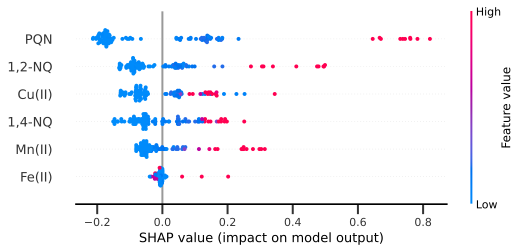

In [50]:
shap.summary_plot(shap_values, X_, show=False)

plt.savefig('SHAP summary2.png', bbox_inches='tight', dpi=1200)
plt.show()

## SHAP dependence plots

In [51]:
main_SHAP = pd.DataFrame(shap_values, columns=X_.columns)
main_SHAP.to_csv('main_SHAP_values.csv')
main_SHAP

Fe(II)    Cu(II)    Mn(II)       PQN    1,2-NQ    1,4-NQ
0   0.120785 -0.070253 -0.049818 -0.157018 -0.073113 -0.049981
1  -0.005080 -0.069107 -0.064243 -0.192138 -0.088468 -0.055052
2  -0.005167 -0.082875 -0.062081 -0.177231 -0.086555 -0.058324
3  -0.004205 -0.081607 -0.065449 -0.163861 -0.086974 -0.061757
4  -0.006024 -0.081259 -0.066053 -0.175560 -0.079263 -0.056016
..       ...       ...       ...       ...       ...       ...
95  0.007208  0.252156  0.012827  0.183868  0.410933  0.018797
96 -0.001366  0.227166  0.005577  0.142894  0.305633  0.180509
97 -0.008335  0.139424 -0.018922  0.042813  0.010763  0.001453
98  0.012721  0.188951  0.169385  0.233698  0.064982  0.251149
99 -0.011410  0.123213  0.032700  0.645396  0.032847  0.130921

[100 rows x 6 columns]

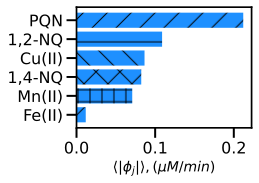

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# create a sample dataframe with SHAP values
df = main_SHAP

# calculate the mean absolute SHAP values for each column
mean_abs_shap = np.abs(df).mean().values

# define a list of unique colors and hatches for each bar
colors = ['dodgerblue']
hatches = ['/', '-', '\\', '\/', '|-',]

# create a figure with a 2*1 axis grid
fig, ax = plt.subplots(1, 1, figsize=(4,3))

# sort the mean absolute SHAP values in descending order
sorted_indices = np.argsort(mean_abs_shap)[::-1]
mean_abs_shap_sorted = mean_abs_shap[sorted_indices]
columns_sorted = df.columns[sorted_indices]

# plot the mean absolute SHAP values as a horizontal bar chart in the second axis
for i, (col, abs_shap) in enumerate(zip(columns_sorted, mean_abs_shap_sorted)):
    ax.barh(col, abs_shap, color=colors[i%len(colors)], hatch=hatches[i%len(hatches)])
ax.set_xlabel(r'$\langle|\phi_j|\rangle,(\mu M/min)$',fontsize = 14)
plt.gca().invert_yaxis() # invert y-axis to show the bars in descending order

# adjust the layout of the figure
fig.tight_layout()

plt.savefig('mean abs SHAP.png', bbox_inches='tight', dpi=1200)

# show the plot
plt.show()

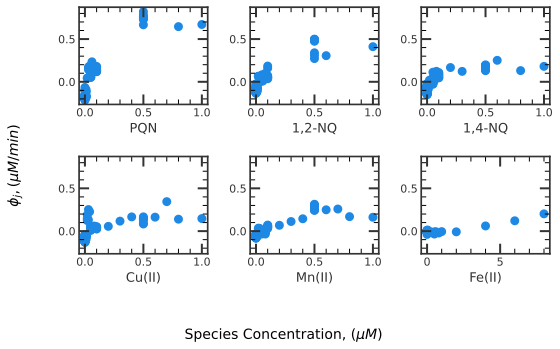

In [53]:
# this plot does not accept explainer object, so we change shap values to values
shap_values = explainer.shap_values(X_)

fig, axes = plt.subplots(2, 3, figsize=(8, 5), sharey=True )
fig.tight_layout(pad=2.5)
fig.supylabel(r'$\phi_j,(\mu M/min)$', fontsize=14)
fig.supxlabel(r'Species Concentration, $(\mu M)$', fontsize=14)

shap.dependence_plot("PQN",shap_values, X_,display_features=X_, interaction_index=None, show = False, dot_size=80,ax=axes[0, 0])
axes[0, 0].spines[['right', 'top']].set_visible(True)
axes[0, 0].tick_params(axis="x", direction="in", which="both", top=True)
axes[0, 0].tick_params(axis="y", direction="in", which="both", right=True)
axes[0, 0].xaxis.set_minor_locator(AutoMinorLocator());axes[0, 0].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('PQN')
axes[0,0].set_ylabel("")


shap.dependence_plot("1,2-NQ",shap_values, X_,display_features=X_, interaction_index=None, show = False, dot_size=80,ax=axes[0, 1])
axes[0,1].spines[['right', 'top']].set_visible(True)
axes[0,1].tick_params(axis="x", direction="in", which="both", top=True)
axes[0,1].tick_params(axis="y", direction="in", which="both", right=True)
axes[0,1].xaxis.set_minor_locator(AutoMinorLocator());axes[0,1].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,2-NQ')
axes[0,1].set_ylabel('');


shap.dependence_plot("1,4-NQ",shap_values, X_,display_features=X_, interaction_index=None, show = False, dot_size=80,ax=axes[0, 2])
axes[0,2].spines[['right', 'top']].set_visible(True)
axes[0,2].tick_params(axis="x", direction="in", which="both", top=True)
axes[0,2].tick_params(axis="y", direction="in", which="both", right=True)
axes[0,2].xaxis.set_minor_locator(AutoMinorLocator());axes[0,2].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,4-NQ')
axes[0,2].set_ylabel('')


shap.dependence_plot("Cu(II)",shap_values, X_,display_features=X_, interaction_index=None, show = False, dot_size=80,ax=axes[1, 0])
axes[1,0].spines[['right', 'top']].set_visible(True)
axes[1,0].tick_params(axis="x", direction="in", which="both", top=True)
axes[1,0].tick_params(axis="y", direction="in", which="both", right=True)
axes[1,0].xaxis.set_minor_locator(AutoMinorLocator());axes[1,0].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Cu(II)')
axes[1,0].set_ylabel("")


shap.dependence_plot("Mn(II)",shap_values, X_,display_features=X_, interaction_index=None, show = False, dot_size=80,ax=axes[1, 1])
axes[1,1].spines[['right', 'top']].set_visible(True)
axes[1,1].tick_params(axis="x", direction="in", which="both", top=True)
axes[1,1].tick_params(axis="y", direction="in", which="both", right=True)
axes[1,1].xaxis.set_minor_locator(AutoMinorLocator());axes[1,1].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Mn(II)')
axes[1,1].set_ylabel("")

shap.dependence_plot("Fe(II)",shap_values, X_,display_features=X_, interaction_index=None, show = False, dot_size=80,ax=axes[1, 2])
axes[1,2].spines[['right', 'top']].set_visible(True)
axes[1,2].tick_params(axis="x", direction="in", which="both", top=True)
axes[1,2].tick_params(axis="y", direction="in", which="both", right=True)
axes[1,2].xaxis.set_minor_locator(AutoMinorLocator());axes[1,2].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Fe(II)')
axes[1,2].set_ylabel("")

plt.tight_layout()
plt.savefig('SHAP dependence 3x3.png', bbox_inches='tight', dpi=1200)
plt.show()

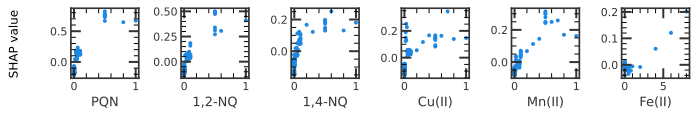

In [54]:
# this plot does not accept explainer object, so we change shap values to values
shap_values = explainer.shap_values(X_)

fig, axes = plt.subplots(1, 6)#, sharey=True )
#fig.tight_layout(pad=0.5)
fig.supylabel(r'SHAP value',y=0.6, fontsize=12)
#fig.supxlabel(r'Species Concentration, $(\mu M)$', fontsize=14)

shap.dependence_plot("PQN",shap_values, X_,display_features=X_, interaction_index=None, show = False, ax=axes[0])
axes[0].spines[['right', 'top']].set_visible(True)
axes[0].tick_params(axis="x", direction="in", which="both", top=True)
axes[0].tick_params(axis="y", direction="in", which="both", right=True)
axes[0].xaxis.set_minor_locator(AutoMinorLocator());axes[0].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('PQN')
axes[0].set_ylabel("")


shap.dependence_plot("1,2-NQ",shap_values, X_,display_features=X_, interaction_index=None, show = False, ax=axes[1])
axes[1].spines[['right', 'top']].set_visible(True)
axes[1].tick_params(axis="x", direction="in", which="both", top=True)
axes[1].tick_params(axis="y", direction="in", which="both", right=True)
axes[1].xaxis.set_minor_locator(AutoMinorLocator());axes[1].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,2-NQ')
axes[1].set_ylabel('');


shap.dependence_plot("1,4-NQ",shap_values, X_,display_features=X_, interaction_index=None, show = False, ax=axes[2])
axes[2].spines[['right', 'top']].set_visible(True)
axes[2].tick_params(axis="x", direction="in", which="both", top=True)
axes[2].tick_params(axis="y", direction="in", which="both", right=True)
axes[2].xaxis.set_minor_locator(AutoMinorLocator());axes[2].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,4-NQ')
axes[2].set_ylabel('')


shap.dependence_plot("Cu(II)",shap_values, X_,display_features=X_, interaction_index=None, show = False, ax=axes[3])
axes[3].spines[['right', 'top']].set_visible(True)
axes[3].tick_params(axis="x", direction="in", which="both", top=True)
axes[3].tick_params(axis="y", direction="in", which="both", right=True)
axes[3].xaxis.set_minor_locator(AutoMinorLocator());axes[3].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Cu(II)')
axes[3].set_ylabel("")


shap.dependence_plot("Mn(II)",shap_values, X_,display_features=X_, interaction_index=None, show = False, ax=axes[4])
axes[4].spines[['right', 'top']].set_visible(True)
axes[4].tick_params(axis="x", direction="in", which="both", top=True)
axes[4].tick_params(axis="y", direction="in", which="both", right=True)
axes[4].xaxis.set_minor_locator(AutoMinorLocator());axes[4].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Mn(II)')
axes[4].set_ylabel("")

shap.dependence_plot("Fe(II)",shap_values, X_,display_features=X_, interaction_index=None, show = False, ax=axes[5])
axes[5].spines[['right', 'top']].set_visible(True)
axes[5].tick_params(axis="x", direction="in", which="both", top=True)
axes[5].tick_params(axis="y", direction="in", which="both", right=True)
axes[5].xaxis.set_minor_locator(AutoMinorLocator());axes[5].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Fe(II)')
axes[5].set_ylabel("")
plt.gcf().set_size_inches(10,2)

plt.tight_layout()
plt.savefig('SHAP dependence.png', bbox_inches='tight', dpi=1200)
plt.show()

## Local Explanations

explainer = shap.Explainer(xgb, X_)
shap_values = explainer(X_)

fig = plt.figure(); 
fig.supylabel(r'Species concentration, $(\mu M)$', fontsize=16)
#fig.supxlabel(r'OP-DTT, $\mu M/min$', fontsize=16)

ax0 = fig.add_subplot(211)
shap.plots.waterfall(shap_values[44], show=False)
ax0.spines[['right', 'top', 'left']].set_visible(True)
ax0.tick_params(axis="x", direction="in", which="both", top=True)
ax0.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())

ax1 = fig.add_subplot(212)
shap.plots.waterfall(shap_values[7], show=False)
ax1.spines[['right', 'top', 'left']].set_visible(True)
ax1.tick_params(axis="x", direction="in", which="both", top=True)
ax1.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())


plt.gcf().set_size_inches(6,8)
plt.xlabel(r'OP-DTT, $(\mu M/min)$', fontsize=16)
plt.tight_layout(pad=.5)
plt.savefig('SHAP local explanations.png', bbox_inches='tight', dpi=1200)
plt.show()

## SHAP main effect plot

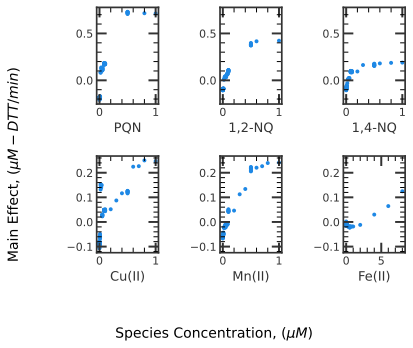

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(20, 5),sharey='row') #sharex=True,, )
fig.tight_layout(pad=1)
fig.supylabel(r'Main Effect, $(\mu M-DTT/min)$', fontsize=14)
fig.supxlabel(r'Species Concentration, $(\mu M)$', fontsize=14)

shap.dependence_plot(("PQN", "PQN"),shap_interaction, X_,display_features=X_,show = False, dot_size=150,ax=axes[0, 0])
axes[0, 0].spines[['right', 'top']].set_visible(True)
axes[0, 0].tick_params(axis="x", direction="in", which="both", top=True)
axes[0, 0].tick_params(axis="y", direction="in", which="both", right=True)
axes[0, 0].xaxis.set_minor_locator(AutoMinorLocator());axes[0, 0].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('PQN')
axes[0,0].set_ylabel("")


shap.dependence_plot(("1,2-NQ", "1,2-NQ"),shap_interaction, X_,display_features=X_,show = False, dot_size=150,ax=axes[0, 1])
axes[0,1].spines[['right', 'top']].set_visible(True)
axes[0,1].tick_params(axis="x", direction="in", which="both", top=True)
axes[0,1].tick_params(axis="y", direction="in", which="both", right=True)
axes[0,1].xaxis.set_minor_locator(AutoMinorLocator());axes[0,1].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,2-NQ')
axes[0,1].set_ylabel('')


shap.dependence_plot(("1,4-NQ", "1,4-NQ"),shap_interaction, X_,display_features=X_,show = False, dot_size=150,ax=axes[0, 2])
axes[0,2].spines[['right', 'top']].set_visible(True)
axes[0,2].tick_params(axis="x", direction="in", which="both", top=True)
axes[0,2].tick_params(axis="y", direction="in", which="both", right=True)
axes[0,2].xaxis.set_minor_locator(AutoMinorLocator());axes[0,2].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,4-NQ')
axes[0,2].set_ylabel('')


shap.dependence_plot(("Cu(II)", "Cu(II)"),shap_interaction, X_,display_features=X_,show = False, dot_size=150,ax=axes[1, 0])
axes[1,0].spines[['right', 'top']].set_visible(True)
axes[1,0].tick_params(axis="x", direction="in", which="both", top=True)
axes[1,0].tick_params(axis="y", direction="in", which="both", right=True)
axes[1,0].xaxis.set_minor_locator(AutoMinorLocator());axes[1,0].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Cu(II)')
axes[1,0].set_ylabel("")


shap.dependence_plot(("Mn(II)", "Mn(II)"),shap_interaction, X_,display_features=X_,show = False, dot_size=150,ax=axes[1, 1])
axes[1,1].spines[['right', 'top']].set_visible(True)
axes[1,1].tick_params(axis="x", direction="in", which="both", top=True)
axes[1,1].tick_params(axis="y", direction="in", which="both", right=True)
axes[1,1].xaxis.set_minor_locator(AutoMinorLocator());axes[1,1].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Mn(II)')
axes[1,1].set_ylabel("")

shap.dependence_plot(("Fe(II)", "Fe(II)"),shap_interaction, X_,display_features=X_,show = False, dot_size=150,ax=axes[1, 2])
axes[1,2].spines[['right', 'top']].set_visible(True)
axes[1,2].tick_params(axis="x", direction="in", which="both", top=True)
axes[1,2].tick_params(axis="y", direction="in", which="both", right=True)
axes[1,2].xaxis.set_minor_locator(AutoMinorLocator());axes[1,2].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Fe(II)');
axes[1,2].set_ylabel("")

plt.tight_layout()
plt.savefig('SHAP Main effect3x3.png', bbox_inches='tight', dpi=1200)
plt.show()

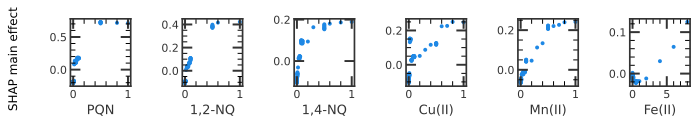

In [56]:
fig, axes = plt.subplots(1, 6, figsize=(10, 2))#, sharey=True )
#fig.tight_layout(pad=0.5)
fig.supylabel(r'SHAP main effect',y=0.55, fontsize=12)
#fig.supxlabel(r'Species Concentration, $(\mu M)$', fontsize=14)

shap.dependence_plot(("PQN", "PQN"),shap_interaction, X_,show = False, ax=axes[0], dot_size=80)
axes[0].spines[['right', 'top']].set_visible(True)
axes[0].tick_params(axis="x", direction="in", which="both", top=True)
axes[0].tick_params(axis="y", direction="in", which="both", right=True)
axes[0].xaxis.set_minor_locator(AutoMinorLocator());axes[0].yaxis.set_minor_locator(AutoMinorLocator())
axes[0].set_ylabel("")

shap.dependence_plot(("1,2-NQ", "1,2-NQ"),shap_interaction, X_,show = False, ax=axes[1], dot_size=80)
axes[1].spines[['right', 'top']].set_visible(True)
axes[1].tick_params(axis="x", direction="in", which="both", top=True)
axes[1].tick_params(axis="y", direction="in", which="both", right=True)
axes[1].xaxis.set_minor_locator(AutoMinorLocator());axes[1].yaxis.set_minor_locator(AutoMinorLocator())
axes[1].set_ylabel("")

shap.dependence_plot(("1,4-NQ", "1,4-NQ"),shap_interaction, X_,show = False, ax=axes[2], dot_size=80)
axes[2].spines[['right', 'top']].set_visible(True)
axes[2].tick_params(axis="x", direction="in", which="both", top=True)
axes[2].tick_params(axis="y", direction="in", which="both", right=True)
axes[2].xaxis.set_minor_locator(AutoMinorLocator());axes[0].yaxis.set_minor_locator(AutoMinorLocator())
axes[2].set_ylabel("")

shap.dependence_plot(("Cu(II)", "Cu(II)"),shap_interaction, X_,show = False, ax=axes[3], dot_size=80)
axes[3].spines[['right', 'top']].set_visible(True)
axes[3].tick_params(axis="x", direction="in", which="both", top=True)
axes[3].tick_params(axis="y", direction="in", which="both", right=True)
axes[3].xaxis.set_minor_locator(AutoMinorLocator());axes[3].yaxis.set_minor_locator(AutoMinorLocator())
axes[3].set_ylabel("")

shap.dependence_plot(("Mn(II)", "Mn(II)"),shap_interaction, X_,show = False, ax=axes[4], dot_size=80)
axes[4].spines[['right', 'top']].set_visible(True)
axes[4].tick_params(axis="x", direction="in", which="both", top=True)
axes[4].tick_params(axis="y", direction="in", which="both", right=True)
axes[4].xaxis.set_minor_locator(AutoMinorLocator());axes[4].yaxis.set_minor_locator(AutoMinorLocator())
axes[4].set_ylabel("")

shap.dependence_plot(("Fe(II)", "Fe(II)"),shap_interaction, X_,show = False, ax=axes[5], dot_size=80)
axes[5].spines[['right', 'top']].set_visible(True)
axes[5].tick_params(axis="x", direction="in", which="both", top=True)
axes[5].tick_params(axis="y", direction="in", which="both", right=True)
axes[5].xaxis.set_minor_locator(AutoMinorLocator());axes[5].yaxis.set_minor_locator(AutoMinorLocator())
axes[5].set_ylabel("")

plt.gcf().set_size_inches(10,2)

plt.tight_layout()
plt.savefig('SHAP main effect.png', bbox_inches='tight', dpi=1200)
plt.show()

In [57]:
interaction_values=shap_interaction

## INTERACTION HEATMAP

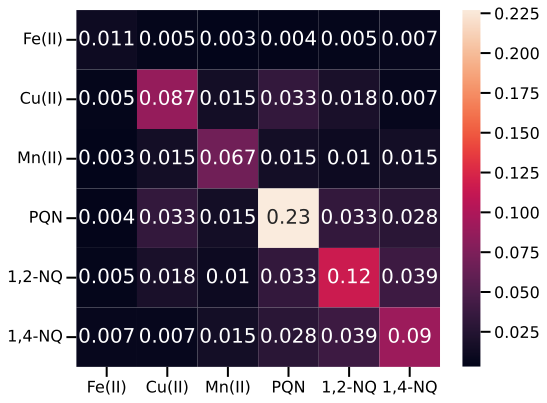

In [58]:
# Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap, index=X_.columns, columns=X_.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2, inplace=True)

# display 
#fig = plt.figure(figsize=(8, 5))#, facecolor='#002637', edgecolor='r')

matrix = np.triu(corr)
sns.heatmap(df.round(decimals=3), annot=True)#, cmap='coolwarm', annot=True, fmt='.6g', cbar=False, ax=ax, )
#ax.tick_params(axis='x', colors='black', labelsize=15, rotation=90)
#ax.tick_params(axis='y', colors='black', labelsize=15)
plt.yticks(rotation=0);plt.tight_layout()
plt.savefig('absSHAP interaction heatmap.png', bbox_inches='tight',dpi=1200)
plt.show()

In [59]:
# Set global font size
plt.rcParams.update({'font.size': 10})

# Set global spines linewidth
plt.rcParams['axes.linewidth'] = 2

# Set global tick length and width
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

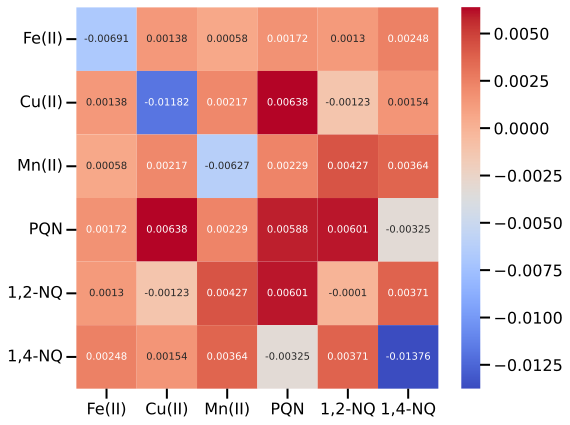

In [60]:
# Get mean of matrices
mean_shap = shap_interaction.mean(0)
df = pd.DataFrame(mean_shap, index=X_.columns, columns=X_.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2, inplace=True)

# display 
#fig = plt.figure(figsize=(8, 5))#, facecolor='#002637', edgecolor='r')

matrix = np.triu(corr)
sns.heatmap(df.round(decimals=5), annot=True, cmap='coolwarm', fmt='.6g', cbar=True,)
#ax.tick_params(axis='x', colors='black', labelsize=15, rotation=90)
#ax.tick_params(axis='y', colors='black', labelsize=15)
plt.yticks(rotation=0);plt.tight_layout()
plt.savefig('meanSHAP interaction heatmap.png', bbox_inches='tight',dpi=1200)
plt.show()

In [61]:
# Assuming you have the SHAP interaction array stored in a variable called 'shap_interaction'
# shap_interaction is a 3D numpy array with shape (100, 6, 6)

# Reshape the array into a 2D array
reshaped_array = shap_interaction.reshape(100, -1)

# Create a pandas DataFrame from the reshaped array
df = pd.DataFrame(reshaped_array)

# Save the DataFrame as a CSV file
df.to_csv('shap_interaction.csv')
shap_interaction

array([[[ 6.45028920e-02,  1.03259959e-02,  1.16066886e-02,
          1.53483960e-02,  1.24577297e-02,  6.54317989e-03],
        [ 1.03259959e-02, -8.91958025e-02, -4.08564645e-03,
          1.53750863e-02, -4.22093785e-03,  1.54861908e-03],
        [ 1.16066886e-02, -4.08564645e-03, -6.04259841e-02,
         -2.26536609e-03, -1.58977195e-03,  6.94245836e-03],
        [ 1.53483960e-02,  1.53750863e-02, -2.26536609e-03,
         -1.91152543e-01,  1.41036249e-04,  5.53562474e-03],
        [ 1.24577297e-02, -4.22093785e-03, -1.58977195e-03,
          1.41036249e-04, -1.01629153e-01,  2.17276968e-02],
        [ 6.54317989e-03,  1.54861908e-03,  6.94245836e-03,
          5.53562474e-03,  2.17276968e-02, -9.22785696e-02]],

       [[-4.35471297e-03, -6.75994795e-05, -1.70820395e-03,
         -4.14028441e-04,  2.69822779e-05,  1.43713583e-03],
        [-6.75994795e-05, -5.63746760e-02, -4.25157113e-03,
         -2.48470779e-03, -7.16665007e-03,  1.23773039e-03],
        [-1.70820395e-03, -4.2

In [62]:
# SHAP interaction matrix for first sample
shap_interaction_matrix = shap_interaction[0,:,:]
shap_interaction_matrix

array([[ 6.45028920e-02,  1.03259959e-02,  1.16066886e-02,
         1.53483960e-02,  1.24577297e-02,  6.54317989e-03],
       [ 1.03259959e-02, -8.91958025e-02, -4.08564645e-03,
         1.53750863e-02, -4.22093785e-03,  1.54861908e-03],
       [ 1.16066886e-02, -4.08564645e-03, -6.04259841e-02,
        -2.26536609e-03, -1.58977195e-03,  6.94245836e-03],
       [ 1.53483960e-02,  1.53750863e-02, -2.26536609e-03,
        -1.91152543e-01,  1.41036249e-04,  5.53562474e-03],
       [ 1.24577297e-02, -4.22093785e-03, -1.58977195e-03,
         1.41036249e-04, -1.01629153e-01,  2.17276968e-02],
       [ 6.54317989e-03,  1.54861908e-03,  6.94245836e-03,
         5.53562474e-03,  2.17276968e-02, -9.22785696e-02]])

In [63]:
# Main effect is the diagonal of the 6x6 matrix
main_effects = shap_interaction_matrix.diagonal()
main_effects

array([ 0.06450289, -0.0891958 , -0.06042598, -0.19115254, -0.10162915,
       -0.09227857])

In [64]:
# Interaction effect is the main SHAP value - main effect
interaction_effects = np.sum((shap_interaction_matrix), axis=1) - (main_effects)
interaction_effects

array([0.05628199, 0.01894312, 0.01060836, 0.03413478, 0.02851575,
       0.04229758])

In [65]:
SV = main_effects + interaction_effects
SV

array([ 0.12078488, -0.07025269, -0.04981762, -0.15701777, -0.0731134 ,
       -0.04998099])

In [66]:
row_sum = np.sum(shap_interaction_matrix[:, 0])
row_sum

0.1207848821847996

In [67]:
shap_df

Fe(II)    Cu(II)    Mn(II)       PQN    1,2-NQ    1,4-NQ
0   0.120785 -0.070253 -0.049818 -0.157018 -0.073113 -0.049981
1  -0.005080 -0.069107 -0.064243 -0.192138 -0.088468 -0.055052
2  -0.005167 -0.082875 -0.062081 -0.177231 -0.086555 -0.058324
3  -0.004205 -0.081607 -0.065449 -0.163861 -0.086974 -0.061757
4  -0.006024 -0.081259 -0.066053 -0.175560 -0.079263 -0.056016
..       ...       ...       ...       ...       ...       ...
95  0.007208  0.252156  0.012827  0.183868  0.410933  0.018797
96 -0.001366  0.227166  0.005577  0.142894  0.305633  0.180509
97 -0.008335  0.139424 -0.018922  0.042813  0.010763  0.001453
98  0.012721  0.188951  0.169385  0.233698  0.064982  0.251149
99 -0.011410  0.123213  0.032700  0.645396  0.032847  0.130921

[100 rows x 6 columns]

In [87]:
SV = pd.read_csv('SV.csv')
ME = pd.read_csv('ME.csv')
IE = pd.read_csv('IE.csv')

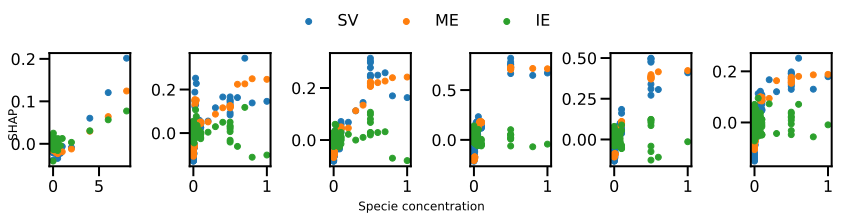

In [125]:
import matplotlib.pyplot as plt

# Define the size of the grid
num_cols = 6

# Create a figure and subplots for each of the columns
fig, axs = plt.subplots(1, num_cols, figsize=(12, 2.5))

# Loop through each column and plot the data
for i, col in enumerate(X_.columns):
    x = X_[col]
    y_sv = SV[col]
    y_me = ME[col]
    y_ie = IE[col]

    # Plot the data on the appropriate subplot
    axs[i].scatter(x, y_sv, label='SV')
    axs[i].scatter(x, y_me, label='ME')
    axs[i].scatter(x, y_ie, label='IE')

# Adjust the layout of the subplots
fig.tight_layout(pad=2)

# Create a legend for the last subplot only at the top center of the figure
handles, labels = axs[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)

# Turn off the legend frame
legend.get_frame().set_linewidth(0)

# Adjust the position of general x and y labels
fig.subplots_adjust(top=0.9)

# Add general x and y labels to the entire figure
#fig.text(0.5, 0.1, 'X Label', fontsize=12, fontweight='bold', ha='center')
#fig.text(0.08, 0.5, 'Y Label', fontsize=12, fontweight='bold', va='center', rotation='vertical')
fig.supxlabel('Specie concentration')
fig.supylabel('SHAP')


# Show the plot
plt.show()

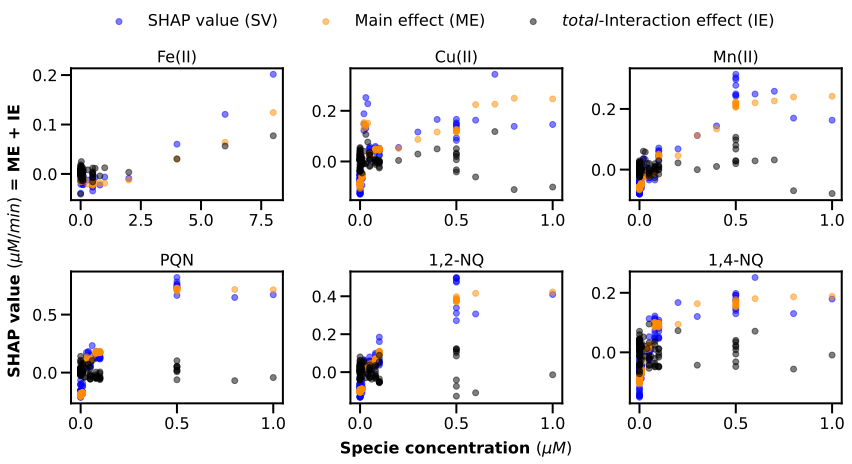

In [182]:
import matplotlib.pyplot as plt

# Define the size of the grid
num_cols = 3
num_rows = 2

# Create a figure and subplots for each of the columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Loop through each column and plot the data
for i, col in enumerate(X_.columns):
    row_index = i // num_cols
    col_index = i % num_cols

    x = X_[col]
    y_sv = SV[col]
    y_me = ME[col]
    y_ie = IE[col]

    # Plot the data on the appropriate subplot
    axs[row_index, col_index].scatter(x, y_sv, label='SHAP value (SV)', color='b', alpha=0.5)
    axs[row_index, col_index].scatter(x, y_me, label='Main effect (ME)', color='darkorange', alpha=0.5)
    axs[row_index, col_index].scatter(x, y_ie, label='$total$-Interaction effect (IE)', color='k', alpha=0.5)

    # Add titles, axis labels to the plot
    axs[row_index, col_index].set_title(col)
    
# Adjust the layout of the subplots
fig.tight_layout(pad=2.5)

# Create a legend for the last subplot only at the top center of the figure
handles, labels = axs[num_rows-1, num_cols-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3)

# Turn off the legend frame
legend.get_frame().set_linewidth(0)

# Adjust the position of general x and y labels
fig.subplots_adjust(top=0.9)

# Add general x and y labels to the entire figure
fig.supxlabel('Specie concentration $(\mu M)$', fontsize=16, fontweight='bold', x=0.52, y=0)
fig.supylabel('SHAP value $(\mu M/min)$ = ME + IE', fontsize=16, fontweight='bold', x=0.0, y=0.5)

plt.savefig('SV=ME+IE.png', bbox_inches='tight', dpi=1200)

# Show the plot
plt.show()

## Major Interactions

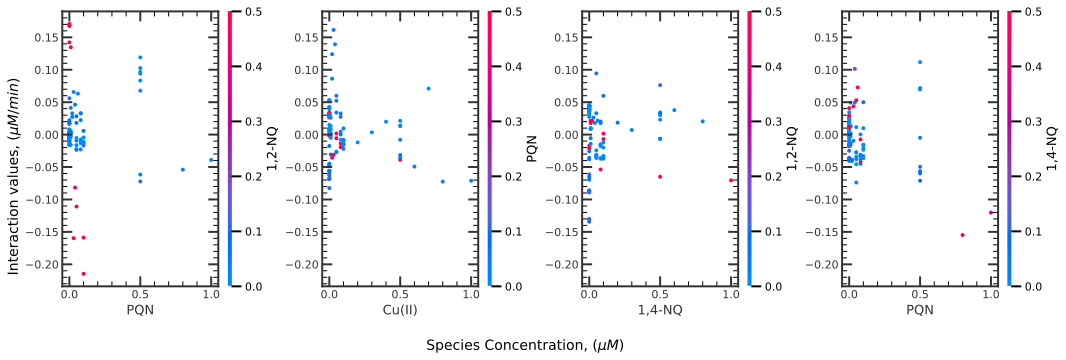

In [68]:
f1= 'Fe(II)'; f2= 'Cu(II)'; f3= 'Mn(II)'; f4= 'PQN'; f5= '1,2-NQ'; f6= '1,4-NQ'


fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True) #sharex=True,, )
fig.tight_layout(pad=.5)
fig.supylabel(r'Interaction values, $(\mu M/min)$', fontsize=14)
fig.supxlabel(r'Species Concentration, $(\mu M)$', fontsize=14)

shap.dependence_plot((f4, f5), shap_interaction, X_, ax=axes[0], display_features=X_,show=False, )
axes[0].spines[['right', 'top']].set_visible(True)
axes[0].tick_params(axis="x", direction="in", which="both", top=True)
axes[0].tick_params(axis="y", direction="in", which="both", right=True)
axes[0].xaxis.set_minor_locator(AutoMinorLocator());axes[0].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('PQN')
axes[0].set_ylabel("")


shap.dependence_plot((f2, f4), shap_interaction, X_,ax=axes[1], display_features=X_,show=False, )
axes[1].spines[['right', 'top']].set_visible(True)
axes[1].tick_params(axis="x", direction="in", which="both", top=True)
axes[1].tick_params(axis="y", direction="in", which="both", right=True)
axes[1].xaxis.set_minor_locator(AutoMinorLocator());axes[1].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Cu(II)')
axes[1].set_ylabel('')


shap.dependence_plot((f6, f5), shap_interaction, X_,ax=axes[2], display_features=X_,show=False, )
axes[2].spines[['right', 'top']].set_visible(True)
axes[2].tick_params(axis="x", direction="in", which="both", top=True)
axes[2].tick_params(axis="y", direction="in", which="both", right=True)
axes[2].xaxis.set_minor_locator(AutoMinorLocator());axes[2].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('1,4-NQ')
axes[2].set_ylabel('')


shap.dependence_plot((f4, f6), shap_interaction, X_,ax=axes[3], display_features=X_,show=False, )
axes[3].spines[['right', 'top']].set_visible(True)
axes[3].tick_params(axis="x", direction="in", which="both", top=True)
axes[3].tick_params(axis="y", direction="in", which="both", right=True)
axes[3].xaxis.set_minor_locator(AutoMinorLocator());axes[3].yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('PQN')
axes[3].set_ylabel("")
plt.tight_layout()
plt.savefig('Major interactions.png', bbox_inches='tight', dpi=1200)
plt.show()

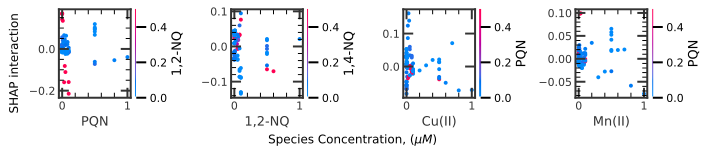

In [69]:
fig, axes = plt.subplots(1, 4)# sharey=True)
fig.tight_layout()
fig.supylabel(r'SHAP interaction',y=0.6, fontsize=12)
fig.supxlabel(r'Species Concentration, $(\mu M)$',x=.5,y=0.12, fontsize=12)

f1= 'Fe(II)'; f2= 'Cu(II)'; f3= 'Mn(II)'; f4= 'PQN'; f5= '1,2-NQ'; f6= '1,4-NQ'

shap.dependence_plot((f4, f5), shap_interaction, X_,ax=axes[0], display_features=X_,show=False)
axes[0].spines[['right', 'top']].set_visible(True)
axes[0].tick_params(axis="x", direction="in", which="both", top=True)
axes[0].tick_params(axis="y", direction="in", which="both", right=True)
axes[0].xaxis.set_minor_locator(AutoMinorLocator());axes[0].yaxis.set_minor_locator(AutoMinorLocator())
axes[0].set_ylabel("");

shap.dependence_plot((f5, f6), shap_interaction, X_,ax=axes[1], display_features=X_,show=False)
axes[1].spines[['right', 'top']].set_visible(True)
axes[1].tick_params(axis="x", direction="in", which="both", top=True)
axes[1].tick_params(axis="y", direction="in", which="both", right=True)
axes[1].xaxis.set_minor_locator(AutoMinorLocator());axes[1].yaxis.set_minor_locator(AutoMinorLocator())
axes[1].set_ylabel("");

shap.dependence_plot((f2, f4), shap_interaction, X_,ax=axes[2], display_features=X_,show=False)
axes[2].spines[['right', 'top']].set_visible(True)
axes[2].tick_params(axis="x", direction="in", which="both", top=True)
axes[2].tick_params(axis="y", direction="in", which="both", right=True)
axes[2].xaxis.set_minor_locator(AutoMinorLocator());axes[0].yaxis.set_minor_locator(AutoMinorLocator())
axes[2].set_ylabel("")

shap.dependence_plot((f3, f4), shap_interaction, X_,ax=axes[3], display_features=X_,show=False)
axes[3].spines[['right', 'top']].set_visible(True)
axes[3].tick_params(axis="x", direction="in", which="both", top=True)
axes[3].tick_params(axis="y", direction="in", which="both", right=True)
axes[3].xaxis.set_minor_locator(AutoMinorLocator());axes[3].yaxis.set_minor_locator(AutoMinorLocator())
axes[3].set_ylabel("")


plt.gcf().set_size_inches(10,2.4)

plt.tight_layout()
plt.savefig('SHAP INT effect.png', bbox_inches='tight', dpi=1200)
plt.show()

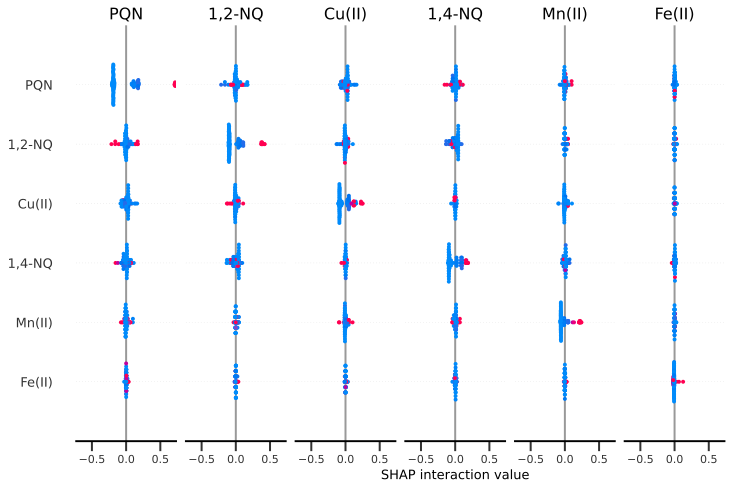

In [70]:
shap.summary_plot(shap_interaction, X_,show=False)
#plt.gcf().set_size_inches(10,3)
#plt.tight_layout(pad=2.5)
plt.savefig('SHAP INT pairplot.png', bbox_inches='tight', dpi=1200)
plt.show()

# RE-EVALUATING SPECIES CONTRIBUTION USING REAL SAMPLES

In [71]:
sample = pd.read_csv('test.csv')

In [72]:
explainer_s = shap.Explainer(xgb, X_)
shap_values_s = explainer_s(sample)

In [73]:
xgb_pred_s=xgb.predict(sample)
xgb_pred_s = pd.DataFrame(xgb_pred_s)
xgb_pred_s.to_csv('sample_xgb_pred.csv')
xgb_pred_s

0
0  0.274163
1  0.648366
2  0.403333
3  0.340157
4  0.974266
5  0.407086
6  0.561721

In [74]:
sample_SHAP = pd.DataFrame(shap_values_s.values, columns=sample.columns)
sample_SHAP.to_csv('sample_SHAP_values.csv')
sample_SHAP

Fe(II)    Cu(II)    Mn(II)       PQN    1,2-NQ    1,4-NQ
0 -0.017126  0.122343 -0.026134 -0.220388 -0.096371 -0.054935
1  0.063301  0.017370  0.142146  0.011644 -0.076240 -0.076628
2  0.021473  0.041536  0.087839 -0.182927 -0.079287 -0.052074
3 -0.019252  0.033852  0.057407 -0.195421 -0.092621 -0.010581
4  0.024038  0.032655  0.165906  0.102376  0.049969  0.032551
5 -0.018596  0.044878  0.098521 -0.184768 -0.087357 -0.012365
6 -0.032412  0.059696  0.106011  0.029748 -0.088008 -0.080087

## Explanatation for Hypothetical sample

fig = plt.figure(figsize=(4,4)); 
fig.supylabel(r'Species concentration, $(\mu M)$', fontsize=16)
#fig.supxlabel(r'OP-DTT, $\mu M/min$', fontsize=16)

ax0 = fig.add_subplot(111)
shap.plots.waterfall(shap_values_s[6], show=False)
ax0.spines[['right', 'top', 'left']].set_visible(True)
ax0.tick_params(axis="x", direction="in", which="both", top=True)
ax0.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())

#plt.gcf().set_size_inches(20,10)
plt.xlabel(r'OP-DTT, $(\mu M/min)$', fontsize=16)
plt.tight_layout(pad=.5)
plt.savefig('SHAP local explanations for HS.png', bbox_inches='tight', dpi=1200)
plt.show()

## Explanations for PSD samples

fig = plt.figure(); 
fig.supylabel(r'Species concentration, $(\mu M)$', fontsize=16)
#fig.supxlabel(r'OP-DTT, $\mu M/min$', fontsize=16)

ax0 = fig.add_subplot(231)
shap.plots.waterfall(shap_values_s[0], show=False)
ax0.spines[['right', 'top', 'left']].set_visible(True)
ax0.tick_params(axis="x", direction="in", which="both", top=True)
ax0.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())

ax1 = fig.add_subplot(232)
shap.plots.waterfall(shap_values_s[1], show=False)
ax1.spines[['right', 'top', 'left']].set_visible(True)
ax1.tick_params(axis="x", direction="in", which="both", top=True)
ax1.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax2 = fig.add_subplot(233)
shap.plots.waterfall(shap_values_s[2], show=False)
ax2.spines[['right', 'top', 'left']].set_visible(True)
ax2.tick_params(axis="x", direction="in", which="both", top=True)
ax2.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax3 = fig.add_subplot(234)
shap.plots.waterfall(shap_values_s[3], show=False)
ax3.spines[['right', 'top', 'left']].set_visible(True)
ax3.tick_params(axis="x", direction="in", which="both", top=True)
ax3.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax3.xaxis.set_minor_locator(AutoMinorLocator())

ax4 = fig.add_subplot(235)
shap.plots.waterfall(shap_values_s[4], show=False)
ax4.spines[['right', 'top', 'left']].set_visible(True)
ax4.tick_params(axis="x", direction="in", which="both", top=True)
ax4.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax4.xaxis.set_minor_locator(AutoMinorLocator())

ax5 = fig.add_subplot(236)
shap.plots.waterfall(shap_values_s[5], show=False)
ax5.spines[['right', 'top', 'left']].set_visible(True)
ax5.tick_params(axis="x", direction="in", which="both", top=True)
ax5.tick_params(axis="y", direction="in", which="both", right=True, left=True)
ax5.xaxis.set_minor_locator(AutoMinorLocator())

plt.gcf().set_size_inches(20,10)
plt.xlabel(r'OP-DTT, $(\mu M/min)$', fontsize=16)
plt.tight_layout(pad=1.5)
plt.savefig('SHAP local explanations for PSD sample.png', bbox_inches='tight', dpi=1200)
plt.show()

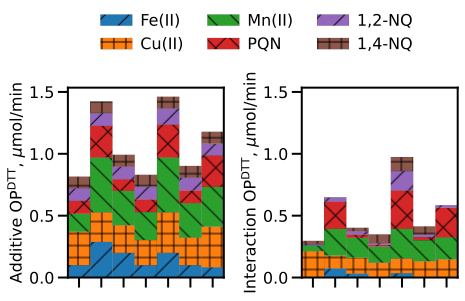

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read data from CSV files
df1 = pd.read_csv('OP_add.csv', index_col=0)
df2 = pd.read_csv('OP_int.csv', index_col=0)

# Get row and column labels
rows = list(df1.index)
cols1 = list(df1.columns)
cols2 = list(df2.columns)

# Define hatches for bars
hatches = ['/', '-|', '\\', '\/']

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5), gridspec_kw={'wspace': 0.5})

# Plot first figure
for i in range(len(rows)):
    ax1.bar(cols1, df1.iloc[i], label=rows[i], bottom=np.sum(df1.iloc[:i], axis=0),
            hatch=hatches[i%len(hatches)], edgecolor='black', linewidth=0.1, width=1)

# Plot second figure
for i in range(len(rows)):
    ax2.bar(cols2, df2.iloc[i], label=rows[i], bottom=np.sum(df2.iloc[:i], axis=0),
            hatch=hatches[i%len(hatches)], edgecolor='black', linewidth=0.1, width=1)

# Move legend to top and stack in 2 rows
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False,
           borderaxespad=0, columnspacing=1.5, handletextpad=0.5)

# Set same y-axis scale for both subplots
ymax = max([ax1.get_ylim()[1], ax2.get_ylim()[1]])
ax1.set_ylim([0, ymax])
ax2.set_ylim([0, ymax])

# Add titles, axis labels, and x-tick label rotation
ax1.set_ylabel(r'Additive OP$^\mathrm{DTT}$, $\mu$mol/min')
ax1.set_xticklabels(cols1, rotation=45)
ax1.set_xticklabels([])
ax2.set_ylabel(r'Interaction OP$^\mathrm{DTT}$, $\mu$mol/min')
ax2.set_xticklabels(cols2, rotation=45)
ax2.set_xticklabels([])

# Remove spaces between bars
ax1.margins(0)
ax2.margins(0)

plt.tight_layout()
plt.savefig('Add and Int OP.png', bbox_inches='tight', dpi=1200)
# Show plot
plt.show()

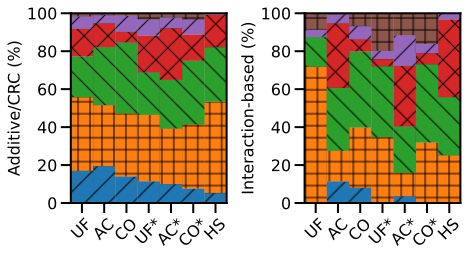

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read data from CSV files
df1 = pd.read_csv('CRC_copy.csv', index_col=0)
df2 = pd.read_csv('SHAP_con.csv', index_col=0)

# Calculate percentage for each column
data_perc1 = (df1 / np.sum(df1, axis=0)) * 100
data_perc2 = (df2 / np.sum(df2, axis=0)) * 100

# Get row and column labels
rows = list(df1.index)
cols1 = list(df1.columns)
cols2 = list(df2.columns)

# Define hatches for bars
hatches = ['/', '-|', '\\', '\/']

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5), gridspec_kw={'wspace': 0.5})

# Plot first figure
for i in range(len(rows)):
    ax1.bar(cols1, data_perc1.iloc[i], label=rows[i], bottom=np.sum(data_perc1.iloc[:i], axis=0),
            hatch=hatches[i%len(hatches)], edgecolor='black', linewidth=0.1, width=1)

# Plot second figure
for i in range(len(rows)):
    ax2.bar(cols2, data_perc2.iloc[i], label=rows[i], bottom=np.sum(data_perc2.iloc[:i], axis=0),
            hatch=hatches[i%len(hatches)], edgecolor='black', linewidth=0.1, width=1)

# Move legend to top and stack in 2 rows
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, frameon=False,
          # borderaxespad=0, columnspacing=1.5, handletextpad=0.5)

# Add titles, axis labels, and x-tick label rotation
ax1.set_ylabel('Additive/CRC (%)')
ax1.set_xticklabels(cols1, rotation=45)
ax2.set_ylabel('Interaction-based (%)')
ax2.set_xticklabels(cols2, rotation=45)

# Remove spaces between bars
ax1.set_ylim(0, 100)
ax1.margins(0)
ax2.set_ylim(0, 100)
ax2.margins(0)

plt.tight_layout()
plt.savefig('Add and Int OP contribution.png', bbox_inches='tight', dpi=1200)
# Show plot
plt.show()

## Prediction at single species concentration

In [79]:
dfs = pd.read_csv('sample_singles.csv')

In [80]:
# xgb prediction for single species conc. at each mode
dfs_pred = pd.DataFrame(xgb.predict(dfs))
dfs_pred.to_csv('test2_predictions_single species.csv')

## OP prediction for each mode

In [81]:
#xgb OP prediction for each mode
df2_pred = pd.DataFrame(xgb.predict(sample.iloc[0:6,:]))
df2_pred1 = pd.DataFrame(xgb.predict(sample.iloc[0:7,:]), columns=['OP'])
df2_pred.to_csv('test_predictions_each mode.csv')

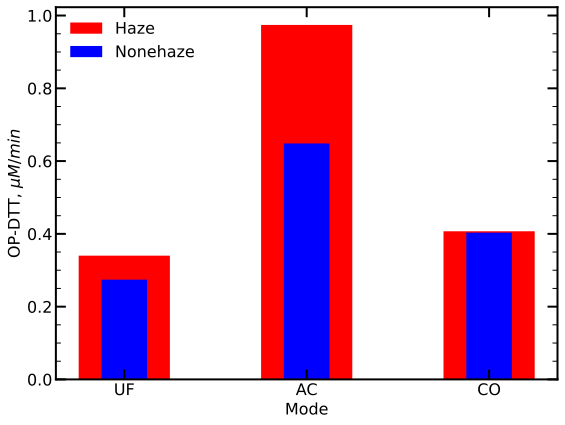

In [82]:
fig, ax = plt.subplots()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis="y", direction="in", which="both", right=True)
ax.tick_params(axis="x", direction="in", which="both", top=True)

r = [0,1,2]
s = [3,4,5]
rs = [0,1,2,3,4,5]
plt.bar(r, df2_pred.loc[3:5,0],width=0.5, color='r',label='Haze')
plt.bar(r, df2_pred.loc[:2,0],width=0.5/2, color='b', label='Nonehaze')

names = ('UF', 'AC', 'CO')

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Mode")

# Custom y axis
plt.ylabel("OP-DTT, $\mu M/min$")

# Add a legend
plt.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig('Sample OP prediction.png', bbox_inches='tight', dpi=1200)
# Show graphic
plt.show()

# Correlation between species conc. and OP-DTT

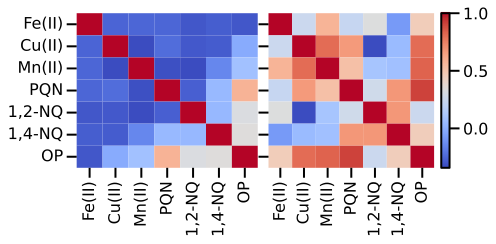

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

sample_OP = pd.concat([sample, df2_pred1], axis=1)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# plot for sample data
corr = ML_data_2.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='0.2f', cbar=None, ax=ax0)

# plot for experimental data
corr1 = sample_OP.corr()
sns.heatmap(corr1, cmap='coolwarm', fmt='0.2f', cbar=None, ax=ax1)
ax1.set_yticklabels([])

# add colorbar
mappable = ax1.collections[0]
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(mappable, cax=cax)

plt.tight_layout()
plt.savefig('Species correlation with OP in sample and simulation.png', bbox_inches='tight', dpi=1200)
plt.show()